In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
df = pd.read_csv('./resources/activity_files.csv')
df.shape[0]

32

In [14]:
# run 1 = 144.44 s

cal_df = pd.DataFrame(columns= ['date', 'calories_burned'])

for i in range(df.shape[0]):
    path = df.iloc[i]['path']
    activity_df = pd.read_json(path)

    # converts dateTime column (type datetime64[ns]) to date column (type string)
    activity_df['dateTime'] = activity_df['dateTime'].astype(str)
    activity_df[['date', 'time']] = activity_df['dateTime'].str.split(' ', expand=True)
    activity_df = activity_df.drop(columns=["dateTime", "time"])

    # renames value column to calories_burned
    activity_df = activity_df.rename(columns={"value": "calories_burned"})
    
    # groups by date
    grouped_df = activity_df.groupby("date").sum()
    
    # adds current df to cal_df
    cal_df = pd.concat([cal_df, grouped_df])
    

print("--- %s seconds ---" % (time.time() - start_time))
cal_df

--- 144.4426290988922 seconds ---


,date,calories_burned
2022-10-09,NaN,1857.6
2022-10-10,NaN,1857.6
2022-10-11,NaN,1857.6
2022-10-12,NaN,1857.6
2022-10-13,NaN,1857.6
...,...,...
2021-07-11,NaN,2295.85
2021-07-12,NaN,2309.36
2021-07-13,NaN,2250.04
2021-07-14,NaN,2593.04


In [45]:
min_df = cal_df[["calories_burned"]].copy()
min_df = min_df.reset_index()
min_df = min_df.rename(columns={"index": "date"})
min_df['date'] = pd.to_datetime(min_df['date'], format='%Y-%m-%d')

min_df

,date,calories_burned
0,2022-10-09,1857.6
1,2022-10-10,1857.6
2,2022-10-11,1857.6
3,2022-10-12,1857.6
4,2022-10-13,1857.6
...,...,...
947,2021-07-11,2295.85
948,2021-07-12,2309.36
949,2021-07-13,2250.04
950,2021-07-14,2593.04


In [46]:
min_df.sort_values(by="date", ascending = True, inplace = True)

min_df

,date,calories_burned
352,2020-07-21,1785.6
353,2020-07-22,1785.6
354,2020-07-23,1785.6
355,2020-07-24,1771.2
356,2020-07-25,1771.2
...,...,...
227,2023-02-23,3644.54
228,2023-02-24,3255.97
229,2023-02-25,1872.0
230,2023-02-26,1872.0


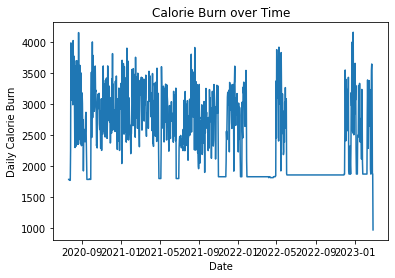

In [49]:
# creates line graph with pyplot
plt.plot(min_df['date'], min_df['calories_burned'])
plt.xlabel("Date")
plt.ylabel("Daily Calorie Burn")
plt.title("Calorie Burn over Time")

plt.show()

In [53]:
# creates scatter plot with plotly
scatter_fig = px.scatter(min_df, x="date", y="calories_burned")
scatter_fig.update_layout(xaxis_title="Date", yaxis_title="Daily Calorie Burn", title="Calorie Burn over Time")

scatter_fig.show()

In [54]:
min_df

,date,calories_burned
352,2020-07-21,1785.6
353,2020-07-22,1785.6
354,2020-07-23,1785.6
355,2020-07-24,1771.2
356,2020-07-25,1771.2
...,...,...
227,2023-02-23,3644.54
228,2023-02-24,3255.97
229,2023-02-25,1872.0
230,2023-02-26,1872.0


In [76]:
from datetime import datetime
startDate = datetime(2020, 8, 1)
endDate = datetime(2023, 1, 30)

min_df.loc[(min_df["date"] > startDate) & (min_df["date"] < endDate), ["date", "calories_burned"]]

,date,calories_burned
364,2020-08-02,3283.81
365,2020-08-03,2987.71
366,2020-08-04,4021.78
367,2020-08-05,3539.67
368,2020-08-06,3300.46
...,...,...
400,2023-01-25,2067.72
401,2023-01-26,1872.0
402,2023-01-27,1872.0
403,2023-01-28,1872.0


In [85]:
startDate = datetime.fromtimestamp(1677704900)
print(startDate)

2023-03-01 13:08:20


In [89]:
def getCalorieDataInRange(start, end, in_milliseconds = False):
    if (in_milliseconds):
        start /= 1000
        end /= 1000
    startDate = datetime.fromtimestamp(start)
    endDate = datetime.fromtimestamp(end)
    return min_df.loc[(min_df["date"] > startDate) & (min_df["date"] < endDate), ["date", "calories_burned"]].to_json(orient="records")
    
jan_data = getCalorieDataInRange(1677359300000, 1677704900000, True)
print(jan_data)

[{"date":1677369600000,"calories_burned":1872.0},{"date":1677456000000,"calories_burned":972.4}]
